In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def poly(x,a,b):
    return a*x**2 + b*x

def line(x,a):
    return a*x

def newCalib(ADC, a, b):
    return 1/(2*a) * (-b + np.sqrt(b**2 + 4*a*ADC))

def newCalibLine(ADC, a):
    return (ADC)/a

def calibLine(ADC,pi0_mode):
    if 'old' in pi0_mode:
        return 0.013456*ADC + 2.06955
    elif 'new' in pi0_mode:
        return 0.01255796*ADC 
    
def invCalibLine(E,pi0_mode):
    if 'old' in pi0_mode:
        return (E - 2.06955) / 0.013456 
    elif 'new' in pi0_mode:
        return E/0.01255796

def newCalib2(ADC):
    return 0.01319672*ADC

def newCalib3(ADC):
    return 0.01255796*ADC

def oldCalib2(ADC):
    return 0.0125*ADC + 13.8

def MichelOnlyCalib(ADC,mode):
    if(mode=='MC'): return ADC/3990.0 * 52.8
    elif(mode=='Data'): return ADC/4040.0 * 52.8
    else: return 0


395.979797464 0.0989949493661


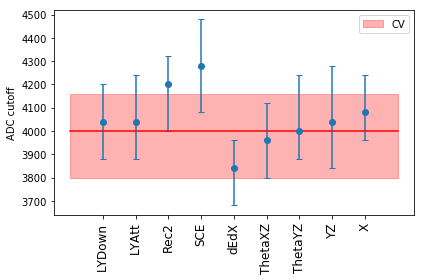

In [2]:
fig,ax = plt.subplots(1,1)
sys_mid = np.array([4000,4040,4040,4200,4280,
                    3840,3960,4000,4040,4080])
sys_high_ranges = np.array([4160,4200,4200,4400,4480,
                            4000,4120,4120,4240,4200])
sys_low_ranges = np.array([3800,3880,3840,4080,4080,
                           3720,3800,3760,3800,3920])
sys_error = np.sqrt(np.sum((sys_mid[1:]-sys_mid[0])**2))
print(sys_error,sys_error/sys_mid[0])
x_ticks=['LYDown','LYAtt','Rec2','SCE','dEdX',
         'ThetaXZ','ThetaYZ','YZ','X']
x = [1,2,3,4,5,6,7,8,9]
x_ = [0] + x + [10]
ax.errorbar(x,sys_mid[1:],
            yerr=(sys_high_ranges[1:]-sys_mid[1:],sys_mid[1:]-sys_low_ranges[1:]),
            capsize=3,fmt='o')
ax.fill_between(x_,sys_high_ranges[0]*np.ones_like(x_),
                sys_low_ranges[0]*np.ones_like(x_),alpha=.3,
                color='red',label='CV')
ax.plot(x_,sys_mid[0]*np.ones_like(x_),color='red')
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks, rotation='vertical', fontsize=12)
plt.legend()
plt.ylabel('ADC cutoff')
plt.tight_layout()
plt.savefig('systematics.png')
plt.show()

In [3]:
pi0_mid_mc_dict = {'old_sep':0.01336,'old_tog':0.01336,'new_sep':0.01283,'old_tog':0.01284}
pi0_low_mc_dict = {'old_sep':0.01331,'old_tog':0.01331,'new_sep':0.01280,'old_tog':0.01280}
pi0_high_mc_dict = {'old_sep':0.01340,'old_tog':0.01339,'new_sep':0.01287,'old_tog':0.01288}
pi0_adc_mc_dict = {'old_sep':9840,'old_tog':9926,'new_sep':9943,'old_tog':10043}

pi0_mid_gmc_dict = {'old_sep':0.01282,'old_tog':0.01284,'new_sep':0.01251,'old_tog':0.01254}
pi0_low_gmc_dict = {'old_sep':0.01274,'old_tog':0.01277,'new_sep':0.01244,'old_tog':0.01247}
pi0_high_gmc_dict = {'old_sep':0.01290,'old_tog':0.01291,'new_sep':0.01258,'old_tog':0.01262}
pi0_adc_gmc_dict = {'old_sep':10091,'old_tog':10209,'new_sep':10042,'old_tog':10187}

pi0_mid_data_dict = {'old_sep':0.01329,'old_tog':0.01331,'new_sep':0.01298,'old_tog':0.01300}
pi0_low_data_dict = {'old_sep':0.01321,'old_tog':0.01323,'new_sep':0.01291,'old_tog':0.01293}
pi0_high_data_dict = {'old_sep':0.01336,'old_tog':0.01338,'new_sep':0.01305,'old_tog':0.01307}
pi0_adc_data_dict = {'old_sep':9749,'old_tog':9749,'new_sep':9806,'old_tog':9806}

Data sigmas: [0.49863863333015757, 0.37608759841331929]
MC sigmas: [0.24095698909634161, 0.24280576928816416, 0.040767223035036076]


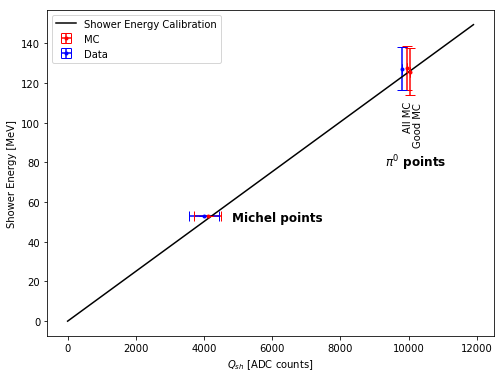

In [8]:
pi0_sys = 0.00112
pi0_mode = 'new_sep'



pi0_mid_mc = pi0_mid_mc_dict[pi0_mode]
pi0_low_mc = pi0_low_mc_dict[pi0_mode] 
pi0_high_mc = pi0_high_mc_dict[pi0_mode]
pi0_adc_mc = pi0_adc_mc_dict[pi0_mode]

pi0_mid_gmc = pi0_mid_gmc_dict[pi0_mode]
pi0_low_gmc = pi0_low_gmc_dict[pi0_mode] 
pi0_high_gmc = pi0_high_gmc_dict[pi0_mode]
pi0_adc_gmc = pi0_adc_gmc_dict[pi0_mode]

pi0_mid_data = pi0_mid_data_dict[pi0_mode]
pi0_low_data = pi0_low_data_dict[pi0_mode] 
pi0_high_data = pi0_high_data_dict[pi0_mode]
pi0_adc_data = pi0_adc_data_dict[pi0_mode]

michel_cutoff_mid_mc = 4110
michel_cutoff_low_mc = 4050
michel_cutoff_high_mc = 4180

michel_cutoff_mid_data = 3990
michel_cutoff_low_data = 3810
michel_cutoff_high_data = 4170

mpi0_high_mc = pi0_mid_mc + np.sqrt((pi0_high_mc-pi0_mid_mc)**2 + pi0_sys**2)
mpi0_low_mc = pi0_mid_mc - np.sqrt((pi0_low_mc-pi0_mid_mc)**2 + pi0_sys**2)
mpi0_high_gmc = pi0_mid_gmc + np.sqrt((pi0_high_mc-pi0_mid_gmc)**2 + pi0_sys**2)
mpi0_low_gmc = pi0_mid_gmc - np.sqrt((pi0_low_mc-pi0_mid_gmc)**2 + pi0_sys**2)
mpi0_high_data = pi0_mid_data + np.sqrt((pi0_high_data-pi0_mid_data)**2 + pi0_sys**2)
mpi0_low_data = pi0_mid_data - np.sqrt((pi0_low_data-pi0_mid_data)**2 + pi0_sys**2)
                                   

MeV_vals_mc = np.array([105.66/2,pi0_mid_mc*pi0_adc_mc,pi0_mid_gmc*pi0_adc_gmc])
MeV_vals_high_mc = np.array([105.66/2,mpi0_high_mc*pi0_adc_mc,mpi0_high_gmc*pi0_adc_gmc])
MeV_errs_high_mc = np.sqrt((MeV_vals_high_mc-MeV_vals_mc)**2)
MeV_vals_low_mc = np.array([105.66/2,mpi0_low_mc*pi0_adc_mc,mpi0_low_gmc*pi0_adc_gmc])
MeV_errs_low_mc = np.sqrt((MeV_vals_low_mc-MeV_vals_mc)**2)

ADC_vals_mc = np.array([michel_cutoff_mid_mc,pi0_adc_mc,pi0_adc_gmc])
ADC_vals_high_mc = np.array([michel_cutoff_high_mc,pi0_adc_mc,pi0_adc_gmc])
ADC_errs_high_mc = np.sqrt((ADC_vals_high_mc-ADC_vals_mc)**2 + np.array([sys_error,0,0])**2)
ADC_vals_low_mc = np.array([michel_cutoff_low_mc,pi0_adc_mc,pi0_adc_gmc])
ADC_errs_low_mc = np.sqrt((ADC_vals_low_mc-ADC_vals_mc)**2 + np.array([sys_error,0,0])**2)


MeV_vals_data = np.array([105.66/2,pi0_mid_data*pi0_adc_data])
MeV_vals_high_data = np.array([105.66/2,mpi0_high_data*pi0_adc_data])
MeV_errs_high_data = np.sqrt((MeV_vals_high_data-MeV_vals_data)**2)
MeV_vals_low_data = np.array([105.66/2,mpi0_low_data*pi0_adc_data])
MeV_errs_low_data = np.sqrt((MeV_vals_low_data-MeV_vals_data)**2)

ADC_vals_data = np.array([michel_cutoff_mid_data,pi0_adc_data])
ADC_vals_high_data = np.array([michel_cutoff_high_data,pi0_adc_data])
ADC_errs_high_data = np.sqrt((ADC_vals_high_data-ADC_vals_data)**2 + np.array([sys_error,0])**2)
ADC_vals_low_data = np.array([michel_cutoff_low_data,pi0_adc_data])
ADC_errs_low_data = np.sqrt((ADC_vals_low_data-ADC_vals_data)**2 + np.array([sys_error,0])**2)

sigmas_data = []
sigmas_mc = []
if invCalibLine(MeV_vals_data[0],pi0_mode) > ADC_vals_data[0]:
    sigmas_data.append((invCalibLine(MeV_vals_data[0],pi0_mode)-ADC_vals_data[0])/ADC_errs_high_data[0])
else:
    sigmas_data.append((-invCalibLine(MeV_vals_data[0],pi0_mode)+ADC_vals_data[0])/ADC_errs_low_data[0])
if calibLine(ADC_vals_data[1],pi0_mode) > MeV_vals_data[1]:
        sigmas_data.append((calibLine(ADC_vals_data[1],pi0_mode)-MeV_vals_data[1])/MeV_errs_high_data[1])
else:
    sigmas_data.append((-calibLine(ADC_vals_data[1],pi0_mode)+MeV_vals_data[1])/MeV_errs_low_data[1])
                       
if invCalibLine(MeV_vals_mc[0],pi0_mode) > ADC_vals_mc[0]:
    sigmas_mc.append((invCalibLine(MeV_vals_mc[0],pi0_mode)-ADC_vals_mc[0])/ADC_errs_high_mc[0])
else:
    sigmas_mc.append((-invCalibLine(MeV_vals_mc[0],pi0_mode)+ADC_vals_mc[0])/ADC_errs_low_mc[0])
for i in [1,2]:
    if calibLine(ADC_vals_mc[i],pi0_mode) > MeV_vals_mc[i]:
        sigmas_mc.append((calibLine(ADC_vals_mc[i],pi0_mode)-MeV_vals_mc[i])/MeV_errs_high_mc[i])
    else:
        sigmas_mc.append((-calibLine(ADC_vals_mc[i],pi0_mode)+MeV_vals_mc[i])/MeV_errs_low_mc[i])
                     
print('Data sigmas:',sigmas_data)
print('MC sigmas:',sigmas_mc)

ADCrange = np.arange(0,12000,100)

fig, ax = plt.subplots(figsize=(8,6))
#plt.plot(ADCrange,oldCalib(ADCrange),label='Old Shower Energy Calibration',color='orange')
plt.plot(ADCrange,calibLine(ADCrange,pi0_mode),label='Shower Energy Calibration',color='black')
plt.xlabel(r'$Q_{sh}$ [ADC counts]')
plt.ylabel('Shower Energy [MeV]')
plt.errorbar(ADC_vals_mc,MeV_vals_mc,
             xerr=(ADC_errs_low_mc,ADC_errs_high_mc),
             yerr=(MeV_errs_low_mc,MeV_errs_high_mc),
             fmt='.',capsize=5,label='MC',color='red')
plt.errorbar(ADC_vals_data,MeV_vals_data,
             xerr=(ADC_errs_low_data,ADC_errs_high_data),
             yerr=(MeV_errs_low_data,MeV_errs_high_data),
             fmt='.',capsize=5,label='Data',color='blue')
plt.text(1.15*ADC_vals_high_mc[0],0.95*MeV_vals_mc[0],"Michel points",fontsize=12,weight='bold',bbox=dict(alpha=0.9,facecolor='white', edgecolor='white'))
plt.text(0.95*ADC_vals_data[1],0.67*MeV_vals_low_data[1],r"$\pi^0$ points",fontsize=12,weight='bold',bbox=dict(alpha=0.9,facecolor='white', edgecolor='white'))
plt.text(0.99*ADC_vals_mc[1],0.92*MeV_vals_low_mc[1],"All MC",fontsize=10,rotation=90)
plt.text(1.01*ADC_vals_mc[2],0.93*MeV_vals_low_mc[2],"Good MC",fontsize=10,rotation=90)


plt.legend()
plt.savefig('TestPointShowerCalib.png')
plt.show()

[ 75.03822285]
[[ 0.01662353]]


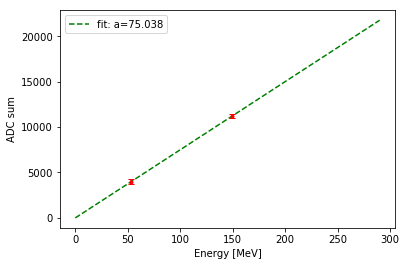

0.0101518422581
0.000498752183964
0.0106505944421


In [18]:

MeV_vals_mc = np.array([105.66/2,
                        149.39])
                        #78.415,
                        #182.155])

ADC_vals_mc = np.array([3990,
                        MeV_vals_mc[1]/0.013332])
                        #MeV_vals_mc[1]/0.016174,
                        #MeV_vals_mc[2]/0.012709])

ADCerrHigh_vals_mc = [4050,
                      MeV_vals_mc[1]/0.013108]
                      #MeV_vals_mc[1]/0.014823,
                      #MeV_vals_mc[2]/0.012009]
ADCerrLow_vals_mc = [3940,
                     MeV_vals_mc[1]/0.013563]
                     #MeV_vals_mc[1]/0.016174,
                     #MeV_vals_mc[2]/0.012709]
ADC_vals_mc_revised = (np.array(ADCerrHigh_vals_mc) + 
                         np.array(ADCerrLow_vals_mc))/2
ADC_sigma_mc_revised = np.array(ADCerrHigh_vals_mc) - ADC_vals_mc_revised
ADC_sigma_mc_revised[0] = np.sqrt(ADC_sigma_mc_revised[0]**2 + (sys_error/2)**2)
plt.errorbar(MeV_vals_mc,ADC_vals_mc,yerr=ADC_sigma_mc_revised,fmt='.',capsize=3,color='red')

MeVrange = np.arange(0,300,10)
poptM,pcov = curve_fit(line,MeV_vals_mc,ADC_vals_mc_revised,sigma=ADC_sigma_mc_revised)
print(poptM)
print(pcov)
plt.plot(MeVrange, line(MeVrange, *poptM), 'g--',
         label='fit: a=%5.3f' % tuple(poptM))
plt.legend()
plt.ylabel('ADC sum')
plt.xlabel('Energy [MeV]')
plt.savefig('FirstFitMC.png')
plt.show()

chi2 = 0

for i,MeV in enumerate(MeV_vals_mc):
    true = ADC_vals_mc_revised[i]
    err = ADC_sigma_mc_revised[i]
    pred = line(MeV,*poptM)
    print(((pred-true)/err)**2)
    chi2+=((pred-true)/err)**2
    
print(chi2)



$ ADC = a E^2 + b E $


$ \frac{ADC}{a} = E(1 + \frac{b}{a}E)$

$E [MeV] = \frac{-b + \sqrt{b^2 + 4 a \times ADC}}{2a}$

[ 75.10989118]
[[ 0.30964416]]


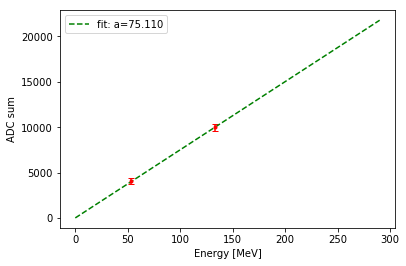

0.048419118025
0.00808437419328
0.0565034922183


In [19]:
MeV_vals_data = np.array([105.66/2,
                          133.17])
                          #73.78485108010896,
                          #179.76305435096828])
ADC_vals_data = np.array([4040,
                          MeV_vals_data[1]/0.013366])
                          #MeV_vals_data[1]/0.01264,
                          #MeV_vals_data[2]/0.01194])

ADCerrHigh_vals_data = [4170,
                        MeV_vals_data[1]/0.012918]
                        #MeV_vals_data[1]/0.011885,
                        #MeV_vals_data[2]/0.011205]
ADCerrLow_vals_data = [3910,
                       MeV_vals_data[1]/0.013821]
                       #MeV_vals_data[1]/0.01391,
                       #MeV_vals_data[2]/0.01237]
ADC_vals_data_revised = (np.array(ADCerrHigh_vals_data) + 
                         np.array(ADCerrLow_vals_data))/2
ADC_sigma_data_revised = np.array(ADCerrHigh_vals_data) - ADC_vals_data_revised
ADC_sigma_data_revised[0] = np.sqrt(ADC_sigma_data_revised[0]**2 + (sys_error/2)**2)
plt.errorbar(MeV_vals_data,ADC_vals_data,yerr=ADC_sigma_data_revised,fmt='.',capsize=3,color='red')

MeVrange = np.arange(0,300,10)
poptD,pcov = curve_fit(line,MeV_vals_data,ADC_vals_data_revised,sigma=ADC_sigma_data_revised)
print(poptD)
print(pcov)
plt.plot(MeVrange, line(MeVrange, *poptD), 'g--',
         label='fit: a=%5.3f' % tuple(poptD))
plt.legend()
plt.ylabel('ADC sum')
plt.xlabel('Energy [MeV]')
plt.savefig('FirstFitData.png')
plt.show()

chi2 = 0

for i,MeV in enumerate(MeV_vals_data):
    true = ADC_vals_data_revised[i]
    err = ADC_sigma_data_revised[i]
    pred = line(MeV,*poptD)
    print(((pred-true)/err)**2)
    chi2+=((pred-true)/err)**2
    
print(chi2)


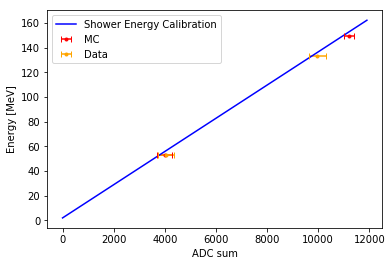

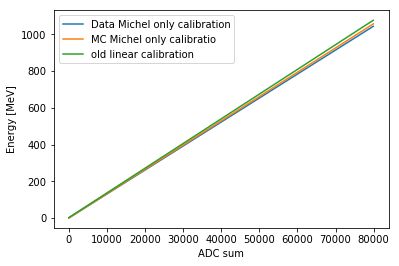

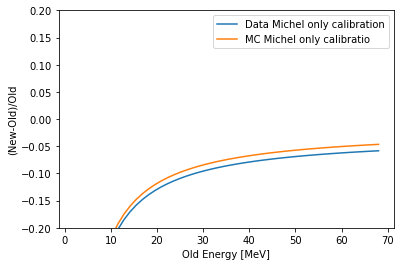

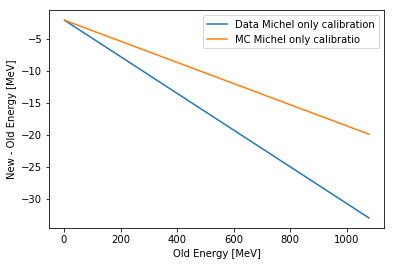

In [22]:


ADCrange = np.arange(0,12000,100)
#plt.plot(ADCrange,newCalibLine(ADCrange,*poptD),label='Data Michel/pi0 calibration')
#plt.plot(ADCrange,newCalibLine(ADCrange,*poptM),label='MC Michel/pi0 calibratio')
plt.plot(ADCrange,oldCalib(ADCrange),label='Shower Energy Calibration',color='blue')
plt.xlabel('ADC sum')
plt.ylabel('Energy [MeV]')
plt.errorbar(ADC_vals_mc,MeV_vals_mc,xerr=ADC_sigma_mc_revised,fmt='.',capsize=3,label='MC',color='red')
plt.errorbar(ADC_vals_data,MeV_vals_data,xerr=ADC_sigma_data_revised,fmt='.',capsize=3,label='Data',color='orange')
plt.legend()
plt.savefig('OldNewComparison.png')
plt.show()

ADCrange = np.arange(0,80000,100)
plt.plot(ADCrange,MichelOnlyCalib(ADCrange,'Data'),label='Data Michel only calibration')
plt.plot(ADCrange,MichelOnlyCalib(ADCrange,'MC'),label='MC Michel only calibratio')
plt.plot(ADCrange,oldCalib(ADCrange),label='old linear calibration')
plt.xlabel('ADC sum')
plt.ylabel('Energy [MeV]')
plt.legend()
plt.savefig('OldNewComparisonMichelOnly.png')
plt.show()

ADCrange = np.arange(0,5000,100)
plt.plot(oldCalib(ADCrange),(MichelOnlyCalib(ADCrange,'Data')-oldCalib(ADCrange))/oldCalib(ADCrange),label='Data Michel only calibration')
plt.plot(oldCalib(ADCrange),(MichelOnlyCalib(ADCrange,'MC')-oldCalib(ADCrange))/oldCalib(ADCrange),label='MC Michel only calibratio')
plt.ylabel('(New-Old)/Old')
plt.xlabel('Old Energy [MeV]')
plt.ylim(-0.2,0.2)
plt.legend()
plt.show()

ADCrange = np.arange(0,80000,100)
plt.plot(oldCalib(ADCrange),(MichelOnlyCalib(ADCrange,'Data')-oldCalib(ADCrange)),label='Data Michel only calibration')
plt.plot(oldCalib(ADCrange),(MichelOnlyCalib(ADCrange,'MC')-oldCalib(ADCrange)),label='MC Michel only calibratio')
plt.ylabel('New - Old Energy [MeV]')
plt.xlabel('Old Energy [MeV]')
plt.legend()
plt.show()